In [ ]:
!pip install --upgrade gspread==5.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import gspread
gc = gspread.service_account(filename='/content/gdrive/My Drive/Colab Notebooks/creds.json')

In [ ]:
import pandas as pd
import os
import gspread as gs
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import timedelta

In [ ]:
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1476ihp5CMdAPtNySk3W3VX4sMEVPVHLMlQNEhEuBLnc/edit?usp=sharing')

In [ ]:
ws = sh.worksheet('Analysis')

In [ ]:
df = pd.DataFrame(ws.get_all_records())
df.head()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [ ]:
# Resample data to daily frequency (if not already)
df = df.resample('D').sum()


<ipython-input-12-e98078add9d7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('D').sum()


In [ ]:
# Train-test split
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
# Fit an Exponential Smoothing model
model = ExponentialSmoothing(train_data['Sales'], seasonal='add', seasonal_periods=7)
model_fit = model.fit()


In [ ]:
# Forecast
forecast_period = len(test_data)
forecast = model_fit.forecast(steps=forecast_period)

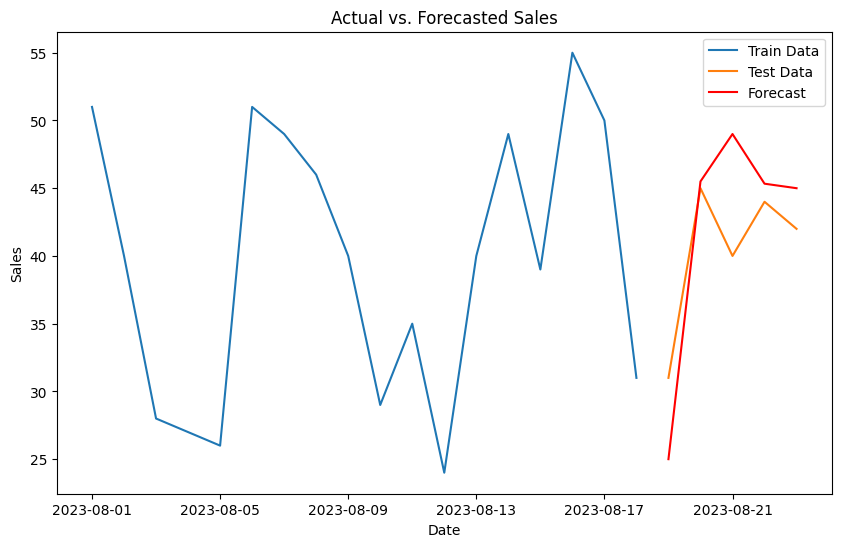

In [ ]:
# Plot actual vs. forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Sales'], label='Train Data')
plt.plot(test_data.index, test_data['Sales'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Actual vs. Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Calculate Days of Supply using the forecasted sales
average_daily_sales = forecast.mean()
current_inventory = 100  # Your current FBA inventory count
days_of_supply = current_inventory / average_daily_sales

print(f"Forecasted average daily sales: {average_daily_sales}")
print(f"Current inventory: {current_inventory}")
print(f"Days of Supply: {days_of_supply}")


Forecasted average daily sales: 41.96647428426439
Current inventory: 100
Days of Supply: 2.3828544500221613
